<a href="https://colab.research.google.com/github/AlexanderSychev2005/Math_ML/blob/main/Matrix_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import tensorflow as tf

## Matrix operations

### Frobenius Norm

In [ ]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [ ]:
(1**2 + 2**2 + 3**2 + 4**2) ** (1/2)

5.477225575051661

In [ ]:
np.linalg.norm(X)

np.float64(5.477225575051661)

In [ ]:
X_pt = torch.tensor([[1, 2], [3, 4.]])
torch.norm(X_pt)

tensor(5.4772)

In [ ]:
X_tf = tf.Variable([[1, 2], [3, 4.]])
tf.norm(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=5.4772257804870605>

### Matrix Multiplication

In [ ]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
b = np.array([1, 2])
b

array([1, 2])

In [ ]:
np.dot(A, b)

array([11, 17, 23])

In [ ]:
A_pt = torch.tensor([[3, 4], [5, 6], [7, 8]])
b_pt = torch.tensor([1, 2])
torch.matmul(A_pt, b_pt) # automatically infers dims in order to perform dot product, matvec, or matrix multiplication

tensor([11, 17, 23])

In [ ]:
A_tf = tf.Variable([[3, 4], [5, 6], [7, 8]])
b_tf = tf.Variable([1, 2])

In [ ]:
tf.linalg.matvec(A_tf, b_tf)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([11, 17, 23], dtype=int32)>

In [ ]:
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
B = np.array([[1, 9], [2, 0]])

In [ ]:
np.dot(A, B)

array([[11, 27],
       [17, 45],
       [23, 63]])

In [ ]:
B_pt = torch.from_numpy(B)
torch.matmul(A_pt, B_pt)

tensor([[11, 27],
        [17, 45],
        [23, 63]])

In [ ]:
A_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[3, 4],
       [5, 6],
       [7, 8]], dtype=int32)>

In [ ]:
B_tf = tf.convert_to_tensor(B, dtype=tf.int32)
tf.matmul(A_tf, B_tf)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 27],
       [17, 45],
       [23, 63]], dtype=int32)>

##Artificial Neuron Layer


In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
_ = torch.manual_seed(42)

In [ ]:
n_input = 784 # Flattened 28x28-pixel image
n_dense = 128

In [ ]:
x = torch.rand(n_input) # Simulate an "input image" with a vector tensor x:

In [ ]:
x.shape

torch.Size([784])

In [ ]:
x[0:6]

tensor([0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009])

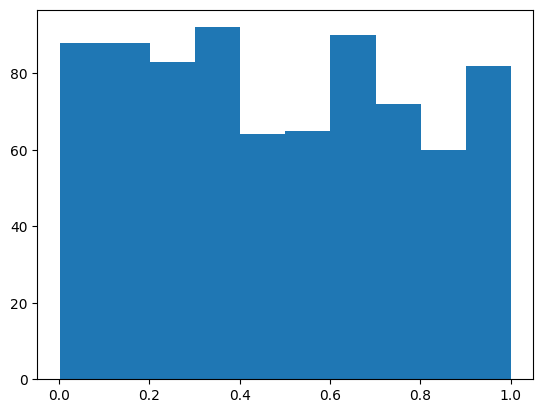

In [ ]:
_ = plt.hist(x)

### Create tensors to store neuron parameters (i.e., weight matrix W, bias vector b) and initialize them with starting values:



In [ ]:
b = torch.zeros(n_dense)

In [ ]:
b.shape

torch.Size([128])

In [ ]:
b[0:6]

tensor([0., 0., 0., 0., 0., 0.])

In [ ]:
W = torch.empty([n_input, n_dense])
W = torch.nn.init.xavier_normal_(W)

In [ ]:
W.shape

torch.Size([784, 128])

In [ ]:
W[0:4, 0:4]

tensor([[ 0.0008,  0.0038,  0.0349,  0.0630],
        [ 0.0872, -0.0505,  0.0414, -0.0391],
        [-0.0162, -0.0056,  0.0555, -0.0571],
        [ 0.0050, -0.0144,  0.0405, -0.0499]])

### Pass the "input image" x through a dense neuron layer with a sigmoid activation function to output the vector tensor a, which contains one element per neuron:

In [ ]:
z = torch.add(torch.matmul(x, W), b)

In [ ]:
a = torch.sigmoid(z)

In [ ]:
a.shape

torch.Size([128])

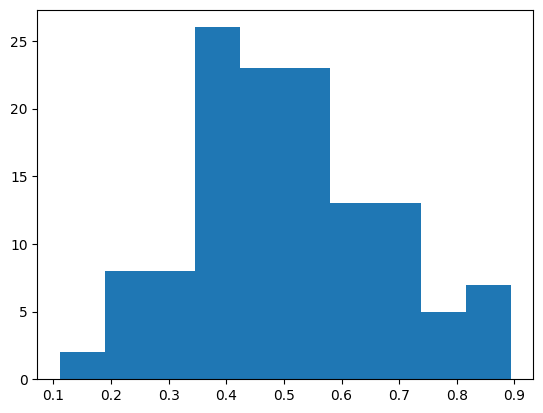

In [ ]:
_ = plt.hist(a)

## Symmetric and Identity Matrices

### Symmetric

In [ ]:
X_sym = np.array([[0, 1, 2], [1, 7, 8], [2, 8, 9]])
X_sym

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [ ]:
X_sym.T

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [ ]:
X_sym == X_sym.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Identity

In [ ]:
I = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [ ]:
x_pt = torch.tensor([1, 2, 3])
x_pt

tensor([1, 2, 3])

In [ ]:
torch.matmul(I, x_pt)

tensor([1, 2, 3])

In [ ]:
tf.eye(2)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.]], dtype=float32)>

## Matrix Inverstion

In [ ]:
X = np.array([[4, 2], [-5, -3]])

In [ ]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [ ]:
y = np.array([4, -7])
y

array([ 4, -7])

In [ ]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that y = X * w

In [ ]:
np.dot(X, w)

array([ 4., -7.])

In [ ]:
torch.inverse(torch.tensor([[4, 2], [-5, -3.]]))

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [ ]:
tf.linalg.inv(tf.Variable([[4, 2], [-5, -3.]]))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.4999998,  0.9999998],
       [-2.4999995, -1.9999996]], dtype=float32)>

In [ ]:
X = np.array([[-4, 1], [-4, 1]])

In [ ]:
X_inv = np.linalg.inv(X)
X_inv

LinAlgError: Singular matrix